<a href="https://colab.research.google.com/github/kshitijmamgain/Fraud-Detection/blob/master/Credit_Card_Focal_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Credit Card Fraud Detection

In [2]:
import pickle
data = pickle.load(open(r"/content/drive/My Drive/Colab Notebooks/data.p","rb"))

In [3]:
xtest = data['xtest']
xtrain = data['xtrain']
ytest = data['ytest']
ytrain = data['ytrain']

In [ ]:

ytrain

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.Series(ytrain).value_counts()

0    213236
1       369
dtype: int64

In [ ]:
np.unique(ytrain, return_counts= True)

(array([0, 1]), array([213236,    369]))

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

fspace = {
      'x': hp.uniform('x', -5,5)
}
def f(params):
    x = params['x']
    val = x**2
    return {'loss' : val, 'status' : STATUS_OK}

trials = Trials()
best = fmin(fn =f, space = fspace, algo = tpe.suggest, max_evals = 1000, trials = trials)

print('best :', best)
print('trials :')
for trial in trials.trials[:2]:
  print(trial)

100%|██████████| 1000/1000 [00:04<00:00, 214.91it/s, best loss: 4.534848789839305e-07]
best : {'x': -0.0006734128592356479}
trials :
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 1.5091851633662152, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [-1.2284889756795603]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 2, 24, 14, 33, 24, 336000), 'refresh_time': datetime.datetime(2020, 2, 24, 14, 33, 24, 336000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 5.603464809098152, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [2.3671638745761037]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 2, 24, 14, 33, 24, 337000), 'refresh_time': datetime.datetime(2020, 2, 24, 14, 33, 24, 337000)}


In [ ]:
type(xtrain)

pandas.core.frame.DataFrame

In [ ]:
xtrain.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
17884,29003.0,-0.840333,-0.526032,1.730303,-0.808008,-0.202882,-0.076848,0.056146,0.267902,0.525878,-0.905381,0.329336,1.038813,0.081657,-0.514504,-1.752012,0.333716,-0.547176,0.093876,0.238069,0.237982,0.048635,0.012774,0.352263,0.062238,-0.872209,0.657536,0.073129,0.186468,110.00
232246,147097.0,-3.756704,-0.853465,-0.449739,-2.423920,-0.407738,-0.107014,0.123247,0.562870,0.962507,-1.103336,-0.023132,0.507055,-0.357271,0.324608,-0.183430,1.423536,-1.248222,0.866346,-0.452917,-1.561872,0.027063,0.623932,-0.040820,0.301513,0.161159,0.373446,-0.862160,0.162344,138.96
208554,137168.0,-2.021166,1.590508,-0.539136,-1.551936,1.969969,-0.392371,-1.103548,-4.127227,0.720191,-1.451599,-1.609796,0.425411,0.318076,-1.590375,-1.174088,0.655528,0.579286,0.127909,-0.933770,-1.341696,3.502419,-2.143531,-2.237819,-1.100941,-0.233121,-0.237687,0.543648,0.186053,131.03
11464,19899.0,1.377495,-0.437941,0.643866,-0.243826,-1.005476,-0.762567,-0.600576,-0.277252,0.776010,0.103307,0.424536,-2.612572,2.113674,0.884224,-1.272799,0.529134,1.386995,-1.545854,0.731178,0.050203,-0.161055,-0.124962,-0.036079,0.358121,0.545512,-0.284928,-0.011904,0.009427,20.00
109718,71510.0,-0.365864,1.084303,1.232877,0.867853,0.141464,-0.838688,0.747583,-0.101419,-0.492603,-0.008579,-0.565222,-0.265531,-0.256620,0.369115,1.052255,-0.321379,-0.174675,0.141157,0.402857,0.141929,0.113073,0.461473,-0.139327,0.386209,-0.198937,-0.316247,0.412181,0.226690,9.09


100%|██████████| 5000/5000 [01:07<00:00, 37.43it/s, best loss: -0.05478399920995436]
best : {'x': 0.8847767089403878}
trials :
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': 18.53955799950267, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [0]}, 'vals': {'x': [-2.1117576143089245]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 2, 24, 14, 33, 43, 930000), 'refresh_time': datetime.datetime(2020, 2, 24, 14, 33, 43, 930000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': 39.50384710567576, 'status': 'ok'}, 'misc': {'tid': 1, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'x': [1]}, 'vals': {'x': [2.6331102463354474]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 2, 24, 14, 33, 43, 931000), 'refresh_time': datetime.datetime(2020, 2, 24, 14, 33, 43, 931000)}


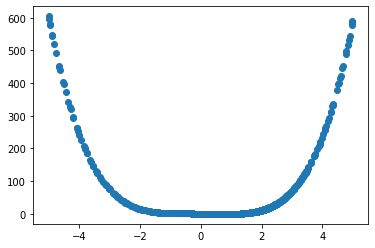

In [ ]:
fspace = {
      'x': hp.uniform('x', -5,5)
}
def f(params):
    x = params['x']
    val = x**4 - x**2 -x +1
    return {'loss' : val, 'status' : STATUS_OK}

trials = Trials()
best = fmin(fn =f, space = fspace, algo = tpe.suggest, max_evals = 5000, trials = trials)

print('best :', best)
print('trials :')
for trial in trials.trials[:2]:
  print(trial)

x = trials.vals['x']
y = [x['loss'] for x in trials.results]
plt.scatter(x,y)

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK

##  import required packages
##
import xgboost as xgb

'''
hp.choice(label, options) — Returns one of the options, which should be a list or tuple.
hp.randint(label, upper) — Returns a random integer between the range [0, upper).
hp.uniform(label, low, high) — Returns a value uniformly between low and high.
hp.quniform(label, low, high, q) — Returns a value round(uniform(low, high) / q) * q, i.e it rounds the decimal values and returns an integer
hp.normal(label, mean, std) — Returns a real value that’s normally-distributed with mean and standard deviation sigma.
'''

# defining the space for hyperparameter tuning
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }




def hyperparameter_tuning(space):
    clf=xgb.XGBClassifier(n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']),min_child_weight=space['min_child_weight'],
                         colsample_bytree=space['colsample_bytree'])
    evaluation = [( xtrain, ytrain), ( xtest, ytest)]
    
    clf.fit(xtrain, ytrain,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)

    pred = clf.predict(xtest)
    accuracy = accuracy_score(ytest, pred>0.5)
    print ("SCORE:", accuracy)
    #change the metric if you like
    return {'loss': -accuracy, 'status': STATUS_OK }


# run the hyper paramter tuning
trials = Trials()
best = fmin(fn=hyperparameter_tuning,
            space=space,
            algo=tpe.suggest,
            max_evals=5,
            trials=trials)

print (best)

SCORE:
0.9991713715906857
SCORE:
0.9991713715906857
SCORE:
0.9991854161399961
SCORE:
0.9990309260975815
SCORE:
0.9989747479003399
100%|██████████| 5/5 [04:20<00:00, 52.41s/it, best loss: -0.9991854161399961]
{'colsample_bytree': 0.7912042086770384, 'gamma': 1.8510662780188936, 'max_depth': 16.0, 'min_child_weight': 3.0, 'reg_alpha': 83.0, 'reg_lambda': 0.7554021610075997}


In [ ]:
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
def objective(space):
    # Instantiate the classifier
    clf = xgb.XGBClassifier(n_estimators =1000,colsample_bytree=space['colsample_bytree'],
                           learning_rate = .3,
                            max_depth = int(space['max_depth']),
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                           gamma = space['gamma'],
                           reg_lambda = space['reg_lambda'])
    
    eval_set  = [( xtrain, ytrain), ( xtest, ytest)]
    
    # Fit the classsifier
    clf.fit(xtrain, ytrain,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)
    
    # Predict on Cross Validation data
    pred = clf.predict(xtest)
    
    # Calculate our Metric - accuracy
    accuracy = accuracy_score(ytest, pred>0.5)
# return needs to be in this below format. We use negative of accuracy since we want to maximize it.
    return {'loss': -accuracy, 'status': STATUS_OK }



In [ ]:
space ={'max_depth': hp.quniform("x_max_depth", 4, 16, 1),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.7, 1),
        'gamma' : hp.uniform ('x_gamma', 0.1,0.5),
        'colsample_bytree' : hp.uniform ('x_colsample_bytree', 0.7,1),
        'reg_lambda' : hp.uniform ('x_reg_lambda', 0,1)
    }

In [ ]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10,
            trials=trials)
print(best)

100%|██████████| 10/10 [05:00<00:00, 30.67s/it, best loss: -0.999592708069998]
{'x_colsample_bytree': 0.870850809363748, 'x_gamma': 0.3258622593267375, 'x_max_depth': 4.0, 'x_min_child': 4.0, 'x_reg_lambda': 0.9718411120160536, 'x_subsample': 0.9082467917705684}


In [ ]:
import lightgbm

In [ ]:
def objective(space):
    # Instantiate the classifier
    clf = xgb.XGBClassifier(n_estimators =int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                         reg_alpha = int(space['reg_alpha']),min_child_weight=space['min_child_weight'],
                         colsample_bytree=space['colsample_bytree'])
    
    eval_set  = [( xtrain, ytrain), ( xtest, ytest)]
    
    # Fit the classsifier
    clf.fit(xtrain, ytrain,
            eval_set=eval_set, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)
    
    # Predict on Cross Validation data
    pred = clf.predict(xtest)
    
    # Calculate our Metric - accuracy
    fscore = f1_score(ytest, pred>0.5)
# return needs to be in this below format. We use negative of accuracy since we want to maximize it.
    return {'loss': -fscore, 'status': STATUS_OK }

space ={'max_depth': hp.quniform("max_depth", 2, 18, 1),
        'gamma': hp.uniform ('gamma', 0,9),
        'reg_alpha' : hp.quniform('reg_alpha', 1,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators':  hp.quniform('n_estimators', 0, 1000, 5)
    }


trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=5000,
            trials=trials)
print(best)



  4%|▍         | 197/5000 [2:54:27<75:39:52, 56.71s/it, best loss: -0.8722466960352423]


AttributeError: ignored

In [ ]:
best['gamma']

6.458259792076614

In [ ]:
    clf = xgb.XGBClassifier(n_estimators =180, max_depth = int(best['max_depth']), gamma = best['gamma'],
                         reg_alpha = best['reg_alpha'],min_child_weight=best['min_child_weight'],
                         colsample_bytree=best['colsample_bytree'])
    clf.fit(xtrain,ytrain)
    ypred = clf.predict(xtest)
    

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(ytest,ypred)

array([[71065,    14],
       [   45,    78]])

In [ ]:
78/(78+45)

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

1.15.0


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

Using TensorFlow backend.


In [ ]:
from sklearn.preprocessing import StandardScaler
xtrain_norm = xtrain

xtrain_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))
xtrain_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))
xtest_norm['Time']

NameError: ignored

In [ ]:
pip install optuna

     |████████████████████████████████| 204kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 8.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 81kB 7.0MB/s 
     |████████████████████████████████| 122kB 18.5MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 112kB 17.1MB/s 
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159543 sha256=87aa33e837d7c0e82b17f52db6a903c4a7a973256a6c761cbe9407175b1eee02
  Stored in directory: /root/.cache/pip/wheels/1f/04/83/76023f7a4c14688c0b5c2682a96392cfdd3ee4449eaaa287ef
Successfully built alembic
  Created wheel for optuna: filename=optuna-1.5.0-cp36-none-any.whl size=276145 sha256=e1d32a50a3c5d251d7febdfdc3e386445a43326afcf3892591fadf9edc945345
  Stored in directory: /root/.cache/pip/wheels/38/

# LGB class

In [ ]:
import pickle
data = pickle.load(open(r"/content/drive/My Drive/Colab Notebooks/data.p","rb"))
xtest = data['xtest']
xtrain = data['xtrain']
ytest = data['ytest']
ytrain = data['ytrain']

In [ ]:
import lgbmclass as lgbc
obj = lgbc.Lgbmclass(xtrain,ytrain)

ModuleNotFoundError: ignored

In [ ]:
obj.train('optuna', device='cpu')

Running 1000 rounds of LGBM parameter optimisation using Optuna:


[I 2020-06-13 20:58:17,927] Finished trial#0 with value: 0.9272416340512902 with parameters: {'num_leaves': 44, 'max_bin': 254, 'lambda_l1': 5.893154810016104, 'lambda_l2': 0.03619192652051383, 'min_data_in_leaf': 356, 'boosting_type': 'goss', 'learning_rate': 0.15615819157003066, 'subsample_for_bin': 160000, 'feature_fraction': 0.9598944782267296, 'bagging_freq': 2}. Best is trial#0 with value: 0.9272416340512902.
[I 2020-06-13 20:59:05,469] Finished trial#1 with value: 0.9528810006989331 with parameters: {'num_leaves': 120, 'max_bin': 254, 'lambda_l1': 1.6589925508379466e-06, 'lambda_l2': 2.01340842555832e-06, 'min_data_in_leaf': 456, 'boosting_type': 'gbdt', 'learning_rate': 0.05861064293264634, 'subsample_for_bin': 200000, 'feature_fraction': 0.8575665949621305, 'bagging_freq': 1, 'subsample': 0.6611039740347395}. Best is trial#0 with value: 0.9272416340512902.
[I 2020-06-13 20:59:56,462] Finished trial#2 with value: 0.6230842700921522 with parameters: {'num_leaves': 152, 'max_bin'

# F-Score

In [6]:
import ast 
import csv
import os
from timeit import default_timer as timer
import random
import numpy as np
import pandas as pd
import lightgbm as lgb
import gc
from sklearn.metrics import f1_score
from hyperopt import STATUS_OK, STATUS_FAIL, hp, tpe, Trials, fmin
#import optuna.integration.lightgbm as lgbo
#import optuna
import matplotlib.pyplot as plt
import pickle
# defining constant
MAX_EVALS = 1000
N_FOLDS = 10
NUM_BOOST_ROUNDS = 10000
EARLY_STOPPING_ROUNDS = 100
SEED = 47
STEP = 25

RESULT_PATH = 'lgbm.csv'
OBJECTIVE_LOSS = 'binary' # use cross_entropy
EVAL_METRIC = ['F1']

def f1_eval(pred, data):
    y = data.get_label()
    f1 = f1_score(y, np.round(pred))
    return 'F1', f1, True

In [7]:
gc.collect()
# File to save first results
out_file = RESULT_PATH
with open(out_file, 'w', newline='') as of_connection:
    writer = csv.writer(of_connection)
    # Write the headers to the file
    writer.writerow(['loss', 'params', 'iteration', 'estimators', 'train_time','optim_type'])
x_train = xtrain
y_train = ytrain
train_set = lgb.Dataset(data=x_train, label=y_train)

# Focal Loss Experimentation

In [46]:
# https://towardsdatascience.com/lightgbm-with-the-focal-loss-for-imbalanced-datasets-9836a9ae00ca
def focal_loss_lgb(y_pred, dtrain, alpha, gamma):
	a,g = alpha, gamma
	y_true = dtrain.label
	def fl(x,t):
		p = 1/(1+np.exp(-x))
		return -( a*t + (1-a)*(1-t) ) * (( 1 - ( t*p + (1-t)*(1-p)) )**g) * ( t*np.log(p)+(1-t)*np.log(1-p) )
	partial_fl = lambda x: fl(x, y_true)
	grad = derivative(partial_fl, y_pred, n=1, dx=1e-6)
	hess = derivative(partial_fl, y_pred, n=2, dx=1e-6)
	return grad, hess

def focal_loss_lgb_eval_error(y_pred, dtrain, alpha, gamma):
	a,g = alpha, gamma
	y_true = dtrain.label
	p = 1/(1+np.exp(-y_pred))
	loss = -( a*y_true + (1-a)*(1-y_true) ) * (( 1 - ( y_true*p + (1-y_true)*(1-p)) )**g) * ( y_true*np.log(p)+(1-y_true)*np.log(1-p) )
	return 'focal_loss', np.mean(loss), False

def sigmoid(x): return 1./(1. +  np.exp(-x))
def lgb_focal_f1_score(preds, lgbDataset):
	"""
	Adaptation of the implementation of the f1 score to be used as evaluation
	score for lightgbm. The adaptation is required since when using custom losses
	the row prediction needs to passed through a sigmoid to represent a
	probability
	Parameters:
	-----------
	preds: numpy.ndarray
		array with the predictions
	lgbDataset: lightgbm.Dataset
	"""
	preds = sigmoid(preds)
	binary_preds = [int(p>0.5) for p in preds]
	y_true = lgbDataset.get_label()
	return 'f1', f1_score(y_true, binary_preds), True
  
focal_loss = lambda x,y: focal_loss_lgb(x, y, 0.74, 1.90)
eval_error = lambda x,y: focal_loss_lgb_eval_error(x, y, 0.74, 1.90)

In [48]:
# Hyperopt Space
params = {
    'num_leaves': hp.quniform('num_leaves', 31, 255, 4),
    'max_bin' : 255, #if using CPU just set this to 254
    'lambda_l1': hp.uniform('lambda_l1', 0.0, 0.5),
    'lambda_l2': hp.uniform("lambda_l2", 0.0, 5),
    'min_data_in_leaf' : hp.quniform('min_data_in_leaf', 30, 500, 20),
    'boosting_type': hp.choice('boosting_type',
                               [{'boosting_type': 'gbdt',
                                 'subsample': hp.uniform('gdbt_subsample', 0.5, 1)}]),
    'min_child_weight': hp.uniform('min_child_weight', 0.1, 10),
    'learning_rate' : hp.loguniform('learning_rate', np.log(0.05), np.log(0.25)),
    'subsample_for_bin': hp.quniform('subsample_for_bin', 20000, 300000, 20000),
    'feature_fraction': hp.uniform('feature_fraction', 0.4, 1.0),
    'bagging_freq': hp.uniform('bagging_freq', 1, 7),
    'verbosity' : 2
    #'objective' : OBJECTIVE_LOSS
    }

In [53]:
def lgb_crossval( params, optim_type):
    '''lgb cross validation model
    Paramters
    ---------
    params: Hyper parameters in dict type from different optimization methods
    optim_type: Is the type of optimization called we use lgb integration for optuna type
    Returns
    ------
    Loss, params, n_estimators, run_time'''
    # initializing the timer
     
    start = timer()
    global result_arr

    params['is_unbalance'] = True
    if optim_type == 'optuna':
        cv_results = lgbo.cv(params, train_set, num_boost_round=NUM_BOOST_ROUNDS,
                             nfold=N_FOLDS, early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                             feval=f1_eval,metrics=EVAL_METRIC, seed=SEED)
    else:
        cv_results = lgb.cv(params, train_set, num_boost_round=NUM_BOOST_ROUNDS,
                            nfold=N_FOLDS, early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                            fobj = focal_loss, feval=lgb_focal_f1_score , verbose_eval=True,seed=SEED)
    # store the runtime
    run_time = timer() - start
    ## appending the cv results
    result_arr.append(cv_results)
    # Extract the best score
    best_score = np.max(cv_results['f1-mean'])
    # Loss must be minimized
    loss = 1 - best_score
    # Boosting rounds that returned the highest cv score
    n_estimators = int(np.argmax(cv_results['f1-mean']) + 1) # more explanation
    estimator = n_estimators
    # Write to the csv file ('a' means append)
    of_connection = open(out_file, 'a')
    writer = csv.writer(of_connection)
    writer.writerow([loss, params, iteration, n_estimators, run_time, optim_type])
    return loss, params, n_estimators, run_time

In [50]:
def hyperopt_obj(params):
    """Objective function for Gradient Boosting Machine Hyperparameter Optimization"""
    optim_type = 'Hyperopt'
    global iteration
    iteration += 1
    # Retrieve the subsample if present otherwise set to 1.0
    subsample = params['boosting_type'].get('subsample', 1.0)
    # Extract the boosting type
    params['boosting_type'] = params['boosting_type']['boosting_type']
    params['subsample'] = subsample
    params['learning_rate'] = 0.3
    # Make sure parameters that need to be integers are integers
    for parameter_name in ['num_leaves', 'subsample_for_bin', 'min_data_in_leaf',
                           'max_bin', 'bagging_freq']:
        params[parameter_name] = int(params[parameter_name])
    # Perform n_folds cross validation
    loss, params, n_estimators, run_time = lgb_crossval(params, optim_type)
    # Dictionary with information for evaluation
    return {'loss':loss, 'params':params, 'iteration': iteration,
            'estimators':n_estimators, 'train_time':run_time, 'status':STATUS_OK}

In [54]:
MAX_EVALS = 20
print('Running {} rounds of LGBM parameter optimisation using Hyperopt:'.format(MAX_EVALS))
fn_name, space, algo ='hyperopt_obj', params, tpe.suggest
iteration = 0
result_arr = []
from scipy.misc import derivative

# create checkpoints
step = 3 # save trial for after every 20 trials
for i in range(1, MAX_EVALS + 1, step):
    print(i)
    # fmin runs until the trials object has max_evals elements in it, so it can do evaluations in chunks like this
    # each step 'best' will be the best trial so far
    # each step 'trials' will be updated to contain every result
    # you can save it to reload later in case of a crash, or you decide to kill the script
    try:
        trials = pickle.load(open("lgb_hyperopt.p","rb"))
        print('loading from saved pickle file... starting from {}'.format(len(trials.trials)))
    except:
        trials = Trials()
        print('creating new trials')
    result = fmin(fn=hyperopt_obj, space=space, algo=algo, max_evals=i,
                  trials=trials, rstate=np.random.RandomState(SEED))
    pickle.dump(trials, open("lgb_hyperopt.p","wb"))

Streaming output truncated to the last 5000 lines.
[98]	cv_agg's f1: 0.850227 + 0.050388
[99]	cv_agg's f1: 0.851326 + 0.0507538
[100]	cv_agg's f1: 0.851404 + 0.0504363
[101]	cv_agg's f1: 0.850028 + 0.0510958
[102]	cv_agg's f1: 0.852442 + 0.0510827
[103]	cv_agg's f1: 0.852394 + 0.0516498
[104]	cv_agg's f1: 0.852382 + 0.0508827
[105]	cv_agg's f1: 0.852504 + 0.0521086
[106]	cv_agg's f1: 0.852504 + 0.0521086
[107]	cv_agg's f1: 0.852504 + 0.0521086
[108]	cv_agg's f1: 0.852527 + 0.0503416
[109]	cv_agg's f1: 0.852382 + 0.0508827
[110]	cv_agg's f1: 0.852382 + 0.0508827
[111]	cv_agg's f1: 0.852382 + 0.0508827
[112]	cv_agg's f1: 0.852382 + 0.0508827
[113]	cv_agg's f1: 0.852382 + 0.0508827
[114]	cv_agg's f1: 0.852382 + 0.0508827
[115]	cv_agg's f1: 0.852382 + 0.0508827
[116]	cv_agg's f1: 0.850517 + 0.0534876
[117]	cv_agg's f1: 0.853473 + 0.0534942
[118]	cv_agg's f1: 0.853473 + 0.0534942
[119]	cv_agg's f1: 0.855904 + 0.0544094
[120]	cv_agg's f1: 0.854703 + 0.0548649
[121]	cv_agg's f1: 0.853485 + 0.

KeyboardInterrupt: ignored

In [66]:
trials.best_trial['result']

{'estimators': 504,
 'iteration': 3,
 'loss': 0.1330042105263518,
 'params': {'bagging_freq': 3,
  'boosting_type': 'gbdt',
  'feature_fraction': 0.5045867172537384,
  'is_unbalance': True,
  'lambda_l1': 0.43434429397585406,
  'lambda_l2': 2.4689887753916935,
  'learning_rate': 0.3,
  'max_bin': 255,
  'min_child_weight': 7.719655841566472,
  'min_data_in_leaf': 300,
  'num_leaves': 156,
  'subsample': 0.7297547449923041,
  'subsample_for_bin': 60000,
  'verbosity': 2},
 'status': 'ok',
 'train_time': 1495.8915338590014}

In [55]:
len(trials.trials)

15

In [ ]:
pd.DataFrame(result_arr[0])

,F1-mean,F1-stdv
0,0.042373,0.003617
1,0.039719,0.025607
2,0.042936,0.015273
3,0.043854,0.007741
4,0.044475,0.008018
...,...,...
390,0.345590,0.061196
391,0.353072,0.057500
392,0.358117,0.059795
393,0.361248,0.060645


In [ ]:
try_params=	{'bagging_freq': 5, 'boosting_type': 'gbdt', 'feature_fraction': 0.426039566517366, 'lambda_l1': 0.28147172304193824, 'lambda_l2': 0.3046866758567513, 'max_bin': 254, 'min_data_in_leaf': 460, 'num_leaves': 60, 'objective': 'binary', 'subsample_for_bin': 220000, 'verbosity': 0, 'subsample': 0.6443699402637724, 'is_unbalance': True}
try_params= {'bagging_freq': 5, 'boosting_type': 'gbdt', 'feature_fraction': 0.7686438685335643, 'lambda_l1': 0.3507728791662556, 'lambda_l2': 0.38483110310941776, 'max_bin': 254, 'min_data_in_leaf': 300, 'num_leaves': 116, 'objective': 'binary', 'subsample_for_bin': 60000, 'verbosity': 1, 'subsample': 0.889057546364846, 'is_unbalance': True}

In [8]:
try_params= {'learning_rate': 0.006, 'max_depth': 1, 'boosting_type': 'gbdt', 'feature_fraction': 0.04, 'lambda_l1': 0.3, 'lambda_l2': 0.6, 'min_data_in_leaf': 80, 'num_leaves': 64, 'objective': 'binary', 'min_child_weight': 0.03, 'verbosity': 1, 'subsample': 0.33}

In [71]:
#params using local_focal
try_params = {'bagging_freq': 3,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.5045867172537384,
 'is_unbalance': True,
 'lambda_l1': 0.43434429397585406,
 'lambda_l2': 2.4689887753916935,
 'learning_rate': 0.1,
 'max_bin': 255,
 'min_child_weight': 7.719655841566472,
 'min_data_in_leaf': 300,
 'num_leaves': 156,
 'subsample': 0.7297547449923041,
 'subsample_for_bin': 60000,
 'verbosity': 2}

In [11]:
cv_results = lgb.cv(try_params, train_set, num_boost_round=NUM_BOOST_ROUNDS,
                     nfold=N_FOLDS, early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                     metrics='auc', verbose_eval=True, seed=SEED)

[1]	cv_agg's auc: 0.866316 + 0.0304477
[2]	cv_agg's auc: 0.856472 + 0.0296192
[3]	cv_agg's auc: 0.844273 + 0.0380406
[4]	cv_agg's auc: 0.843551 + 0.0422961
[5]	cv_agg's auc: 0.870275 + 0.0480675
[6]	cv_agg's auc: 0.873984 + 0.0454629
[7]	cv_agg's auc: 0.872572 + 0.0456085
[8]	cv_agg's auc: 0.880941 + 0.0499672
[9]	cv_agg's auc: 0.876559 + 0.0509941
[10]	cv_agg's auc: 0.877675 + 0.0505901
[11]	cv_agg's auc: 0.878555 + 0.0503567
[12]	cv_agg's auc: 0.87987 + 0.0462992
[13]	cv_agg's auc: 0.885529 + 0.0444905
[14]	cv_agg's auc: 0.886342 + 0.045115
[15]	cv_agg's auc: 0.890648 + 0.0417144
[16]	cv_agg's auc: 0.887897 + 0.0414066
[17]	cv_agg's auc: 0.892578 + 0.0397159
[18]	cv_agg's auc: 0.89307 + 0.038632
[19]	cv_agg's auc: 0.895664 + 0.0371985
[20]	cv_agg's auc: 0.895959 + 0.0371427
[21]	cv_agg's auc: 0.896456 + 0.0379863
[22]	cv_agg's auc: 0.892278 + 0.0384051
[23]	cv_agg's auc: 0.893676 + 0.0373194
[24]	cv_agg's auc: 0.911832 + 0.0319375
[25]	cv_agg's auc: 0.91307 + 0.0310315
[26]	cv_agg's 

In [72]:
clf = lgb.train(try_params, train_set, num_boost_round=504)

In [73]:
preds = clf.predict(xtest)
pred_y = [int(p>0.5) for p in preds]
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, classification_report, auc
print(confusion_matrix(ytest, pred_y))
print(roc_auc_score(ytest,preds))
precision, recall, _ = precision_recall_curve(ytest, preds)
print(auc(recall, precision))
print(classification_report(ytest, pred_y))

[[71071     8]
 [   30    93]]
0.9657648760677029
0.8524992177151195
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.92      0.76      0.83       123

    accuracy                           1.00     71202
   macro avg       0.96      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



In [74]:
preds = clf.predict(xtrain)
pred_y = [int(p>0.5) for p in preds]
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, classification_report, auc
print(confusion_matrix(ytrain, pred_y))
print(roc_auc_score(ytrain,preds))
precision, recall, _ = precision_recall_curve(ytrain, preds)
print(auc(recall, precision))
print(classification_report(ytrain, pred_y))

[[213218     18]
 [    73    296]]
0.9999333156118332
0.9643177184197442
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    213236
           1       0.94      0.80      0.87       369

    accuracy                           1.00    213605
   macro avg       0.97      0.90      0.93    213605
weighted avg       1.00      1.00      1.00    213605



In [32]:
dataset = xtrain
dataset['Class'] = ytrain

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


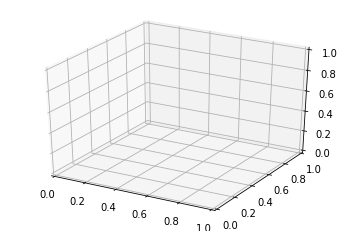

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

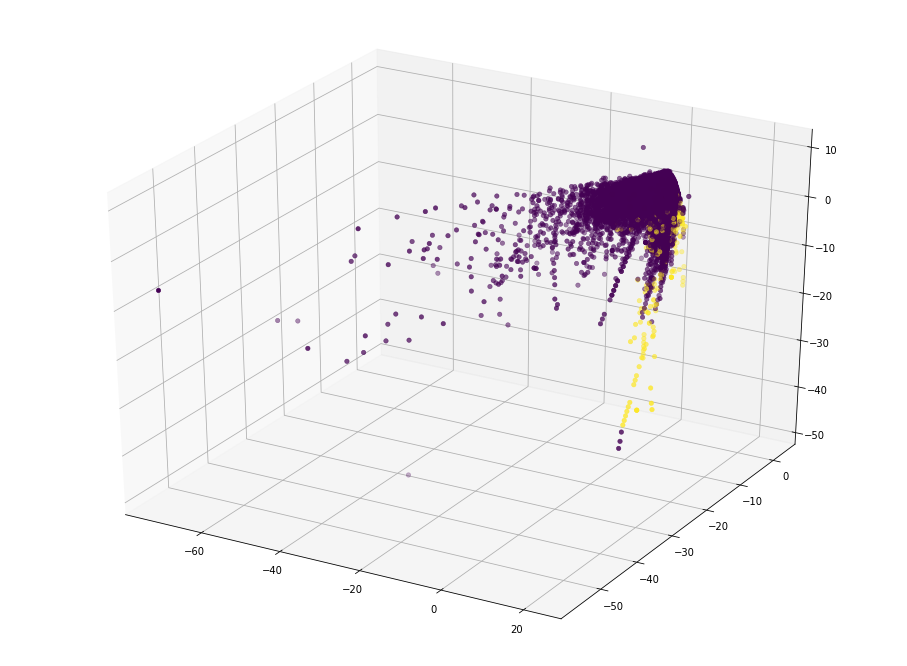

In [44]:
plt.figure(figsize=(16,12))
ax = plt.axes(projection='3d')
ax.scatter(dataset['V2'], dataset['V1'], dataset['V3'], c=dataset['Class'], cmap='viridis', linewidth=0.5);